# 第4.1章 插值法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 实现差商和牛顿插值多项式

In [2]:
def generate_diff_quotient_table(x, f):
    # x包含插值节点
    # f包含节点的函数值
    n = len(x)-1 # n次多项式
    
    a = np.zeros((n+1, n+1)) * np.nan
    a[:,0] = f
    
    for col in range(1,n+1):
        for row in range(col,n+1):
            a[row,col] = (a[row,col-1] - a[row-1,col-1])/(x[row]-x[row-col])
            
    return a

### 课本例子2.3

In [3]:
# 函数输入
xinput = [0.4, 0.55, 0.65, 0.8, 0.9, 1.05]
finput = [0.41075, 0.57815, 0.69675, 0.88811, 1.02652, 1.25382]

# 复现表格2.5
coef = generate_diff_quotient_table(xinput, finput)
pd.DataFrame(coef)

0         1         2         3         4         5
0  0.41075       NaN       NaN       NaN       NaN       NaN
1  0.57815  1.116000       NaN       NaN       NaN       NaN
2  0.69675  1.186000  0.280000       NaN       NaN       NaN
3  0.88811  1.275733  0.358933  0.197333       NaN       NaN
4  1.02652  1.384100  0.433467  0.212952  0.031238       NaN
5  1.25382  1.515333  0.524933  0.228667  0.031429  0.000293

In [4]:
# 取插值点
x = 0.596

for m in [1,2,3,4,5]: # m为近似的多项式次数
    y = np.zeros(m+1)
    y[0] = 1
    for j in range(1,m+1):
        y[j] = y[j-1]*(x-xinput[j-1])
    approx_value = np.sum(y * np.diag(coef)[0:(m+1)])
    print("近似多项式阶数 = {:1d} 近似值为 = {:.5f}".format(m, approx_value))

近似多项式阶数 = 1 近似值为 = 0.62949
近似多项式阶数 = 2 近似值为 = 0.63201
近似多项式阶数 = 3 近似值为 = 0.63191
近似多项式阶数 = 4 近似值为 = 0.63192
近似多项式阶数 = 5 近似值为 = 0.63192


In [5]:
def plot_basis_func(m, idx, figsize=(3,3), title="", savefig=False):
    """
        画Lagrange插值的基函数
        m 是多项式次数
        idx 是要画出基函数的序号
    """

    plt.figure(figsize=figsize)
    xinput = np.arange(0,m+1)
    yinput = np.zeros(m+1)
    yinput[idx] = 1
    coef = generate_diff_quotient_table(xinput, yinput)

    # 画多项式的图
    x_grid = np.arange(0, stop=m, step=0.02)
    Px_grid = np.zeros(len(x_grid)) # 多项式在x_grid处的数值

    for i in range(len(x_grid)):
        x = x_grid[i]
        y = np.zeros(m+1)
        y[0] = 1
        for j in range(1,m+1):
            y[j] = y[j-1]*(x-xinput[j-1])
        Px_grid[i] = np.sum(y * np.diag(coef)[0:(m+1)])

    plt.plot(x_grid, Px_grid, linewidth=2)
    plt.xlim([-0.2,m+0.2])
    plt.ylim([-0.5,1.5])
    plt.title(title)
    plt.xticks(np.arange(m+1), [r'$x_{:d}$'.format(j) for j in range(m+1)])
    plt.yticks(np.arange(2),[0,1])
    plt.grid()
    plt.tight_layout()
    if savefig:
        plt.savefig("basis_func_"+str(m+1) + "_"+str(idx)+".pdf")


### 线性近似的基函数

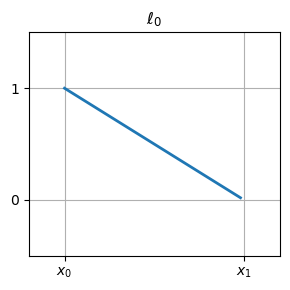

In [6]:
plot_basis_func(1, 0, figsize=(3,3), title=r"$\ell_0$")

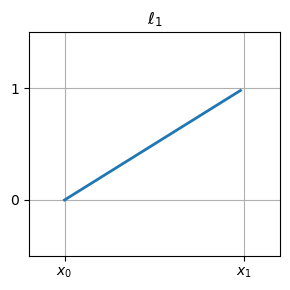

In [7]:
plot_basis_func(1, 1, figsize=(3,3), title=r"$\ell_1$")

### 二次函数的基函数

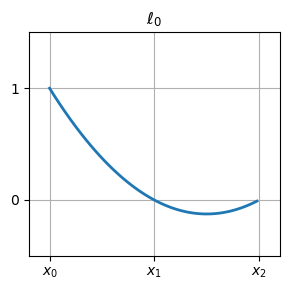

In [8]:
plot_basis_func(2, 0, figsize=(3,3), title=r"$\ell_0$")

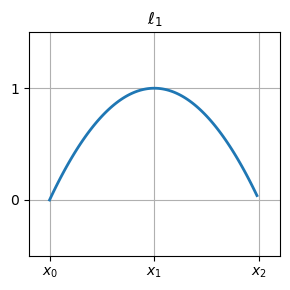

In [9]:
plot_basis_func(2, 1, figsize=(3,3), title=r"$\ell_1$")

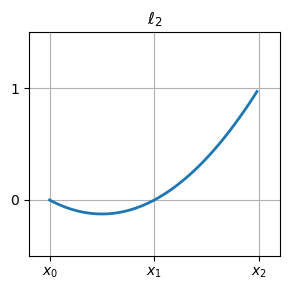

In [10]:
plot_basis_func(2, 2, figsize=(3,3), title=r"$\ell_2$")

## 高次多项式可以非常好地近似$\sin$函数

In [11]:
def plot_sin_approximate(points_select, m_list = [1, 2, 3, 4, 5, 6]):
    """ 
        m_list contains the number of degree of polynomials
        points_select is a function that select grid points (see examples below)
    """
    
    if len(m_list) != 6:
        print("Please choose 6 values for m_list!")
        return
    
    plt.figure(figsize=(6,5))
    
    for m_idx in range(len(m_list)):
        m = m_list[m_idx]
        xinput = points_select(m)     
        yinput = np.sin(xinput)
        coef = generate_diff_quotient_table(xinput, yinput)

        # 画多项式的图
        x_grid = np.arange(0, stop=np.pi, step=0.02)
        Px_grid = np.zeros(len(x_grid)) # 多项式在x_grid处的数值

        for i in range(len(x_grid)):
            x = x_grid[i]
            y = np.zeros(m+1)
            y[0] = 1
            for j in range(1,m+1):
                y[j] = y[j-1]*(x-xinput[j-1])

            Px_grid[i] = np.sum(y * np.diag(coef)[0:(m+1)])

        plt.subplot(3,2,m_idx+1)
        plt.plot(x_grid, Px_grid, 'b--', label="polynomial", linewidth=1.5)
        plt.plot(x_grid, np.sin(x_grid), 'r-.', label='true', linewidth=1.5)
        plt.plot(xinput, yinput, 'kx', label='data points')
        plt.title("m="+str(m))
        if m_idx == 5:
            plt.legend(bbox_to_anchor=(1.0, 1.0))
        
    plt.tight_layout()

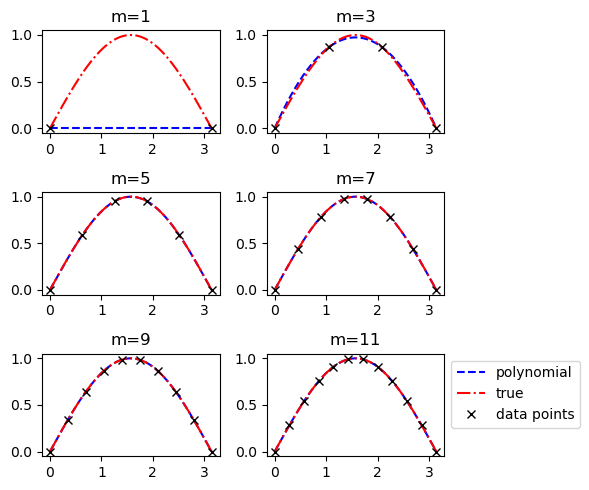

In [12]:
points_select = lambda n : np.array([np.pi * k/n for k in range(n+1)])
plot_sin_approximate(points_select, m_list=[1,3,5,7,9,11])

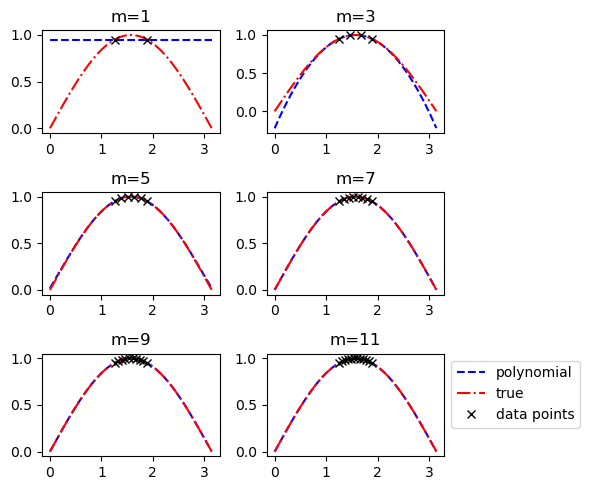

In [13]:
points_select = lambda n : np.array([np.pi*0.4 + 0.2*np.pi * k/n for k in range(n+1)]) 
plot_sin_approximate(points_select, m_list=[1,3,5,7,9,11])

## Runge的例子来证明高次多项式近似有时不适用

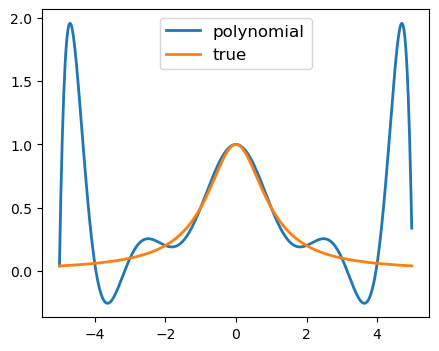

In [14]:
m = 10 # 使用10次多项式
xinput = np.array([-5 + 10 * k/m for k in range(m+1)])
yinput = 1/(1+xinput**2)
coef = generate_diff_quotient_table(xinput, yinput)

# 画多项式的图
x_grid = np.arange(-5, stop=5, step=0.02)
Px_grid = np.zeros(len(x_grid)) # 多项式在x_grid处的数值

for i in range(len(x_grid)):
    x = x_grid[i]
    y = np.zeros(m+1)
    y[0] = 1
    for j in range(1,m+1):
        y[j] = y[j-1]*(x-xinput[j-1])
    Px_grid[i] = np.sum(y * np.diag(coef)[0:(m+1)])


plt.figure(figsize=(5,4))
plt.plot(x_grid, Px_grid, label="polynomial", linewidth=2)
plt.plot(x_grid, 1/(1+x_grid**2), label='true', linewidth=2)
plt.legend(loc='upper center', fontsize=12)
plt.show()